Imagine you are working for a travel agency named "Wanderlust Adventures." Your team has been assigned a project to analyze and visualize the travel data for the past year. The data includes information about various destinations, the number of travelers per month, and the revenue generated. As the data analyst, you decide to use Matplotlib to create insightful visualizations.
As a data analyst at "Wanderlust Adventures," you have been given a dataset containing monthly travel data for different destinations. The dataset includes information about the number of travelers and the revenue generated each month. Your task is to create three visualizations using Matplotlib: a line plot, a pie chart, and a scatter plot.

1. **Line Plot**: Create a line plot using Matplotlib that illustrates the trend of both traveler count and revenue over the past year. The x-axis should represent the months, while the y-axis should represent the traveler count and revenue, respectively. The line plot should display two lines, one for traveler count and another for revenue, showcasing their trends over time.
2. **Pie Chart**: Generate a pie chart using Matplotlib to display the distribution of traveler count among the top five destinations for the entire year. Each slice of the pie should represent a destination, and its size should correspond to the proportion of travelers visiting that particular destination.
3. **Scatter Plot**: Create a scatter plot using Matplotlib that demonstrates the relationship between the number of travelers and the revenue generated for each month. Each data point on the scatter plot should represent a month, with the x-coordinate representing the traveler count and the y-coordinate representing the revenue generated.
Note: Use the file called "travel.csv"

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/sample_data/travel.csv")

In [ ]:
df.head()

,Month,Destination,Travelers,Revenue
0,Jan,Paris,1000,150000
1,Jan,Rome,800,120000
2,Feb,Paris,1100,165000
3,Feb,Rome,900,135000
4,Mar,Paris,1200,180000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        120 non-null    object
 1   Destination  120 non-null    object
 2   Travelers    120 non-null    int64 
 3   Revenue      120 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.9+ KB


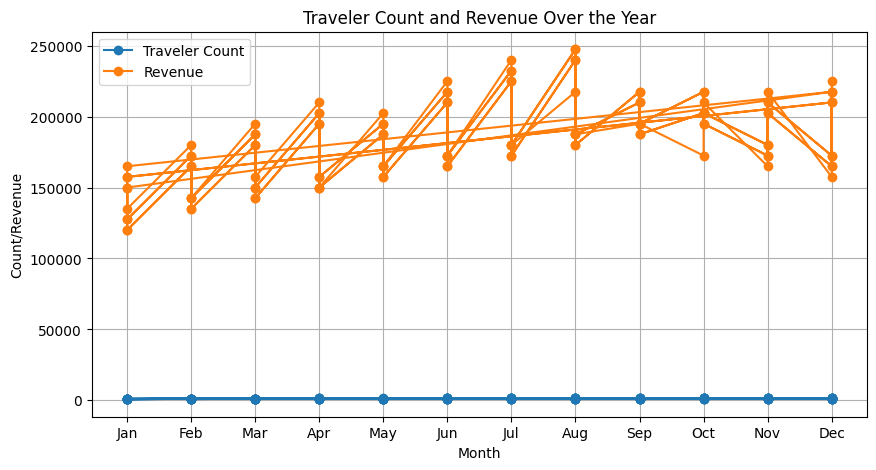

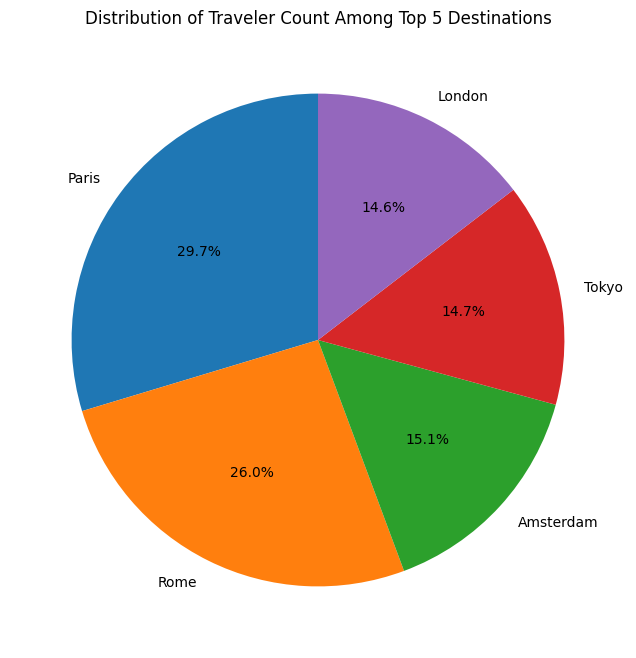

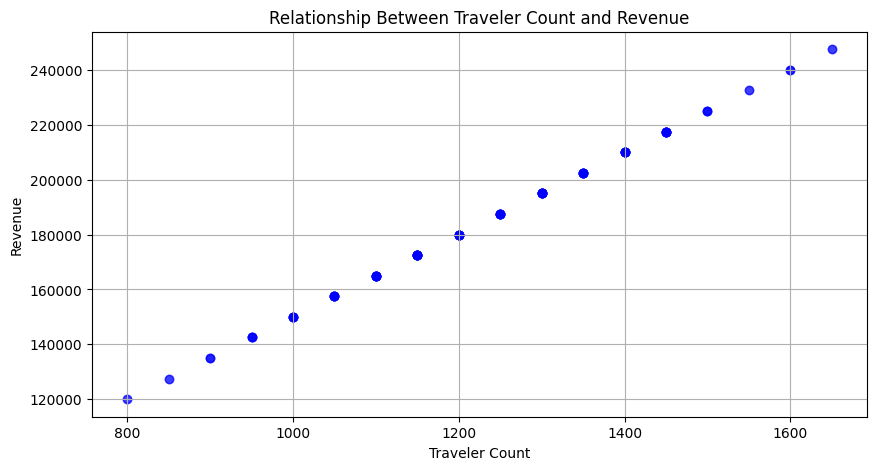

In [ ]:
# 1. Line Plot
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], df['Travelers'], label='Traveler Count', marker='o')
plt.plot(df['Month'], df['Revenue'], label='Revenue', marker='o')
plt.xlabel('Month')
plt.ylabel('Count/Revenue')
plt.title('Traveler Count and Revenue Over the Year')
plt.legend()
plt.grid(True)
plt.show()

# 2. Pie Chart
top_destinations = df.groupby('Destination')['Travelers'].sum().nlargest(5)
plt.figure(figsize=(8, 8))
plt.pie(top_destinations, labels=top_destinations.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Traveler Count Among Top 5 Destinations')
plt.show()

# 3. Scatter Plot
plt.figure(figsize=(10, 5))
plt.scatter(df['Travelers'], df['Revenue'], c='blue', alpha=0.5)
plt.xlabel('Traveler Count')
plt.ylabel('Revenue')
plt.title('Relationship Between Traveler Count and Revenue')
plt.grid(True)
plt.show()


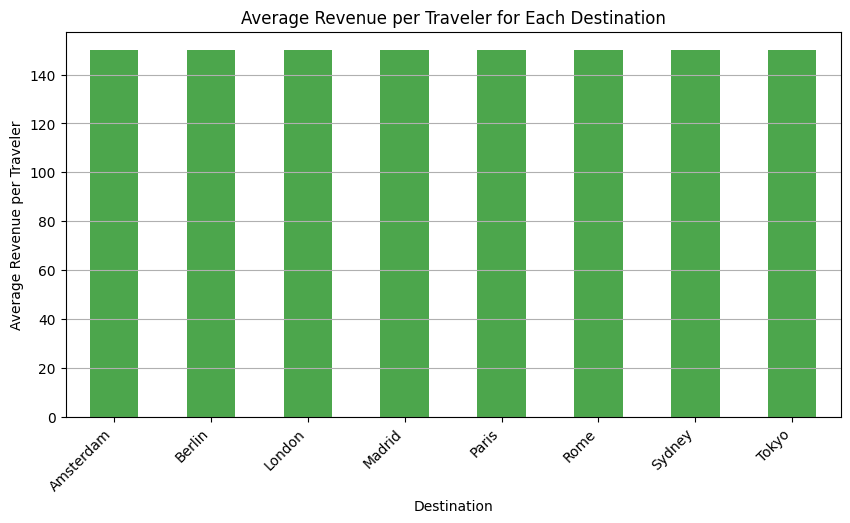

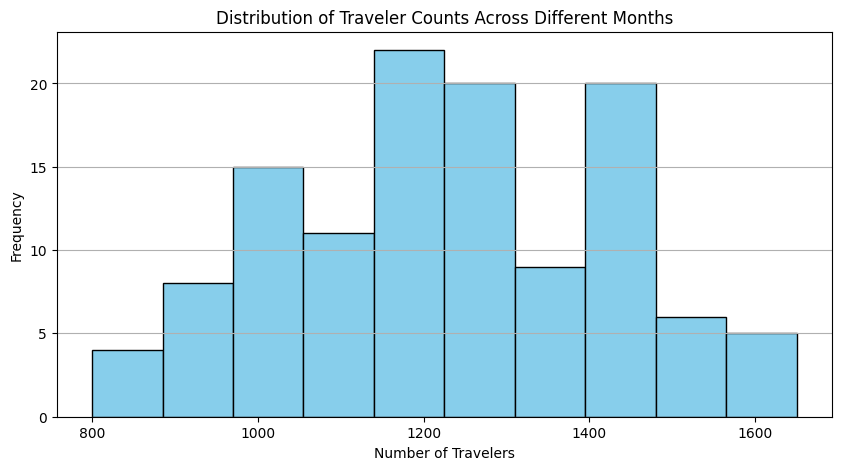

In [ ]:
# 4. Bar Plot - Average Revenue per Traveler for Each Destination
avg_rev_per_traveler = df.groupby('Destination')['Revenue'].mean() / df.groupby('Destination')['Travelers'].mean()
plt.figure(figsize=(10, 5))
avg_rev_per_traveler.plot(kind='bar', color='green', alpha=0.7)
plt.xlabel('Destination')
plt.ylabel('Average Revenue per Traveler')
plt.title('Average Revenue per Traveler for Each Destination')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

# 5. Histogram - Distribution of Traveler Counts Across Different Months
plt.figure(figsize=(10, 5))
plt.hist(df['Travelers'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Number of Travelers')
plt.ylabel('Frequency')
plt.title('Distribution of Traveler Counts Across Different Months')
plt.grid(axis='y')
plt.show()


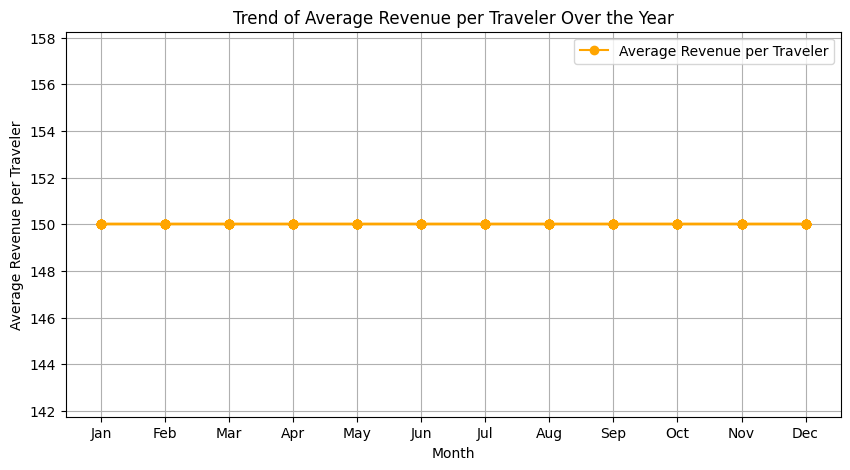

In [ ]:
# 6. Line Plot - Trend of Average Revenue per Traveler
avg_rev_per_traveler = df['Revenue'] / df['Travelers']
plt.figure(figsize=(10, 5))
plt.plot(df['Month'], avg_rev_per_traveler, label='Average Revenue per Traveler', marker='o', color='orange')
plt.xlabel('Month')
plt.ylabel('Average Revenue per Traveler')
plt.title('Trend of Average Revenue per Traveler Over the Year')
plt.legend()
plt.grid(True)
plt.show()


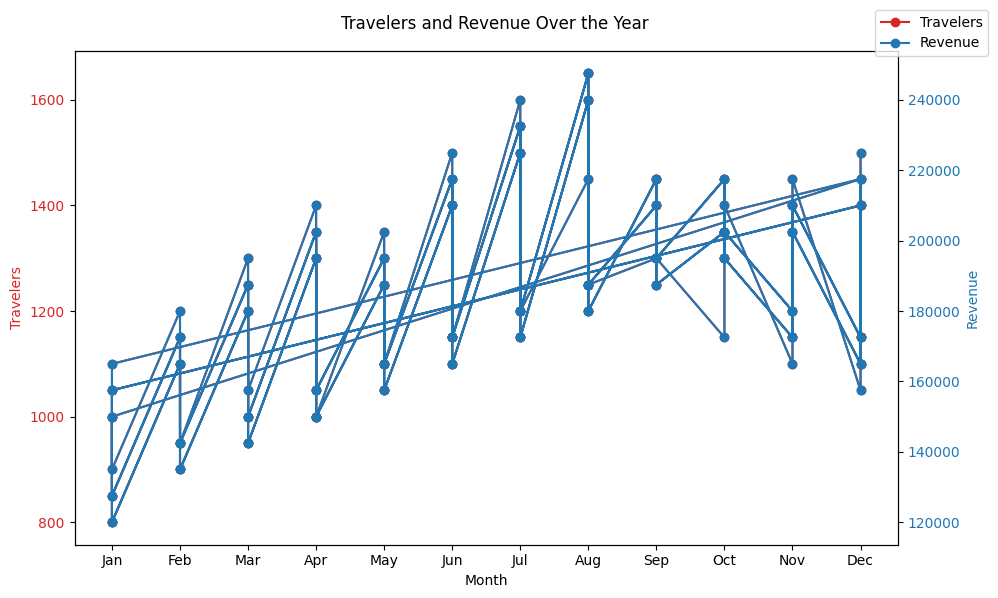

In [ ]:
# Other way of Line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Travelers', color=color)
ax1.plot(df['Month'], df['Travelers'], marker='o', color=color, label='Travelers')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Revenue', color=color)
ax2.plot(df['Month'], df['Revenue'], marker='o', color=color, label='Revenue')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Travelers and Revenue Over the Year')
fig.tight_layout()
fig.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.show()

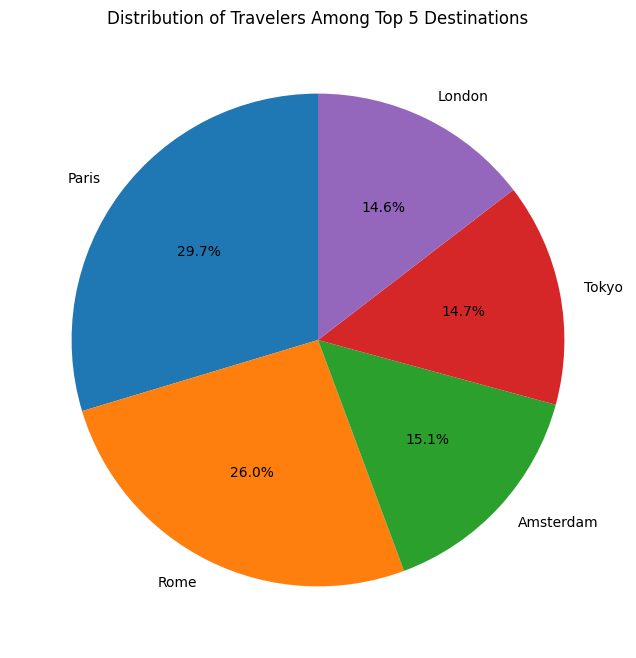

In [ ]:
# Other way of pie chart
destination_counts = df.groupby('Destination')['Travelers'].sum().nlargest(5)

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(destination_counts, labels=destination_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Distribution of Travelers Among Top 5 Destinations')

plt.show()

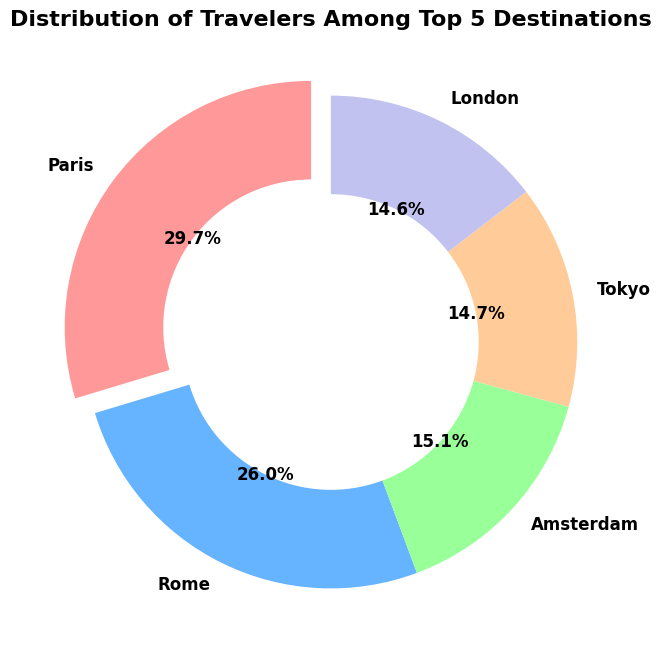

In [ ]:
# Pie Chart / donut chart
destination_counts = df.groupby('Destination')['Travelers'].sum().nlargest(5)

# Custom colors for each destination
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

fig, ax = plt.subplots(figsize=(10, 8))
explode = (0.1, 0, 0, 0, 0)  # explode the 1st slice (Paris)

wedges, texts, autotexts = ax.pie(
    destination_counts,
    autopct='%1.1f%%',
    startangle=90,
    labels=destination_counts.index,
    colors=colors,
    wedgeprops=dict(width=0.4),
    explode=explode,
)

# Increase the size and boldness of the labels
for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

ax.set_title('Distribution of Travelers Among Top 5 Destinations', fontsize=16, fontweight='bold')

plt.show()

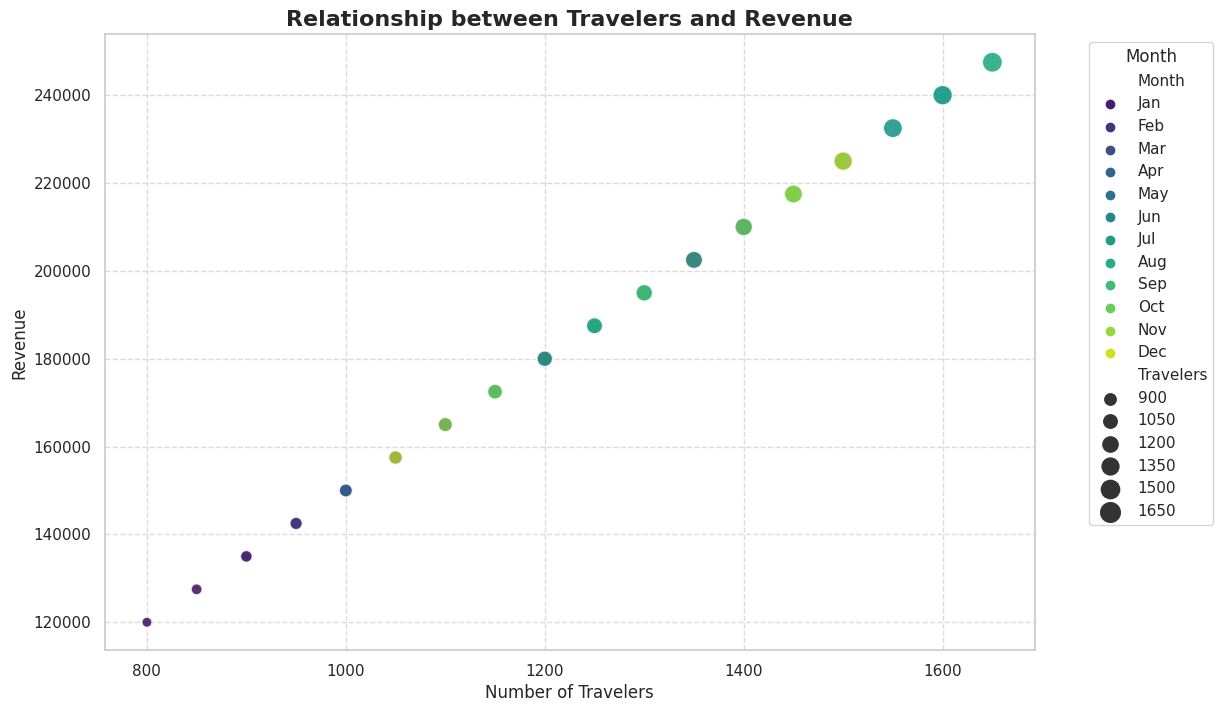

In [ ]:
#Other way of scatter plot
import seaborn as sns
# Set a stylish seaborn theme
sns.set(style="whitegrid")

# Scatter Plot with Seaborn
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='Travelers', y='Revenue', hue='Month', size='Travelers', sizes=(50, 200),
                          palette='viridis', edgecolor='w', alpha=0.7, data=df)

# Adding a title
plt.title('Relationship between Travelers and Revenue', fontsize=16, fontweight='bold')

# Set labels
plt.xlabel('Number of Travelers', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

# Display legend
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

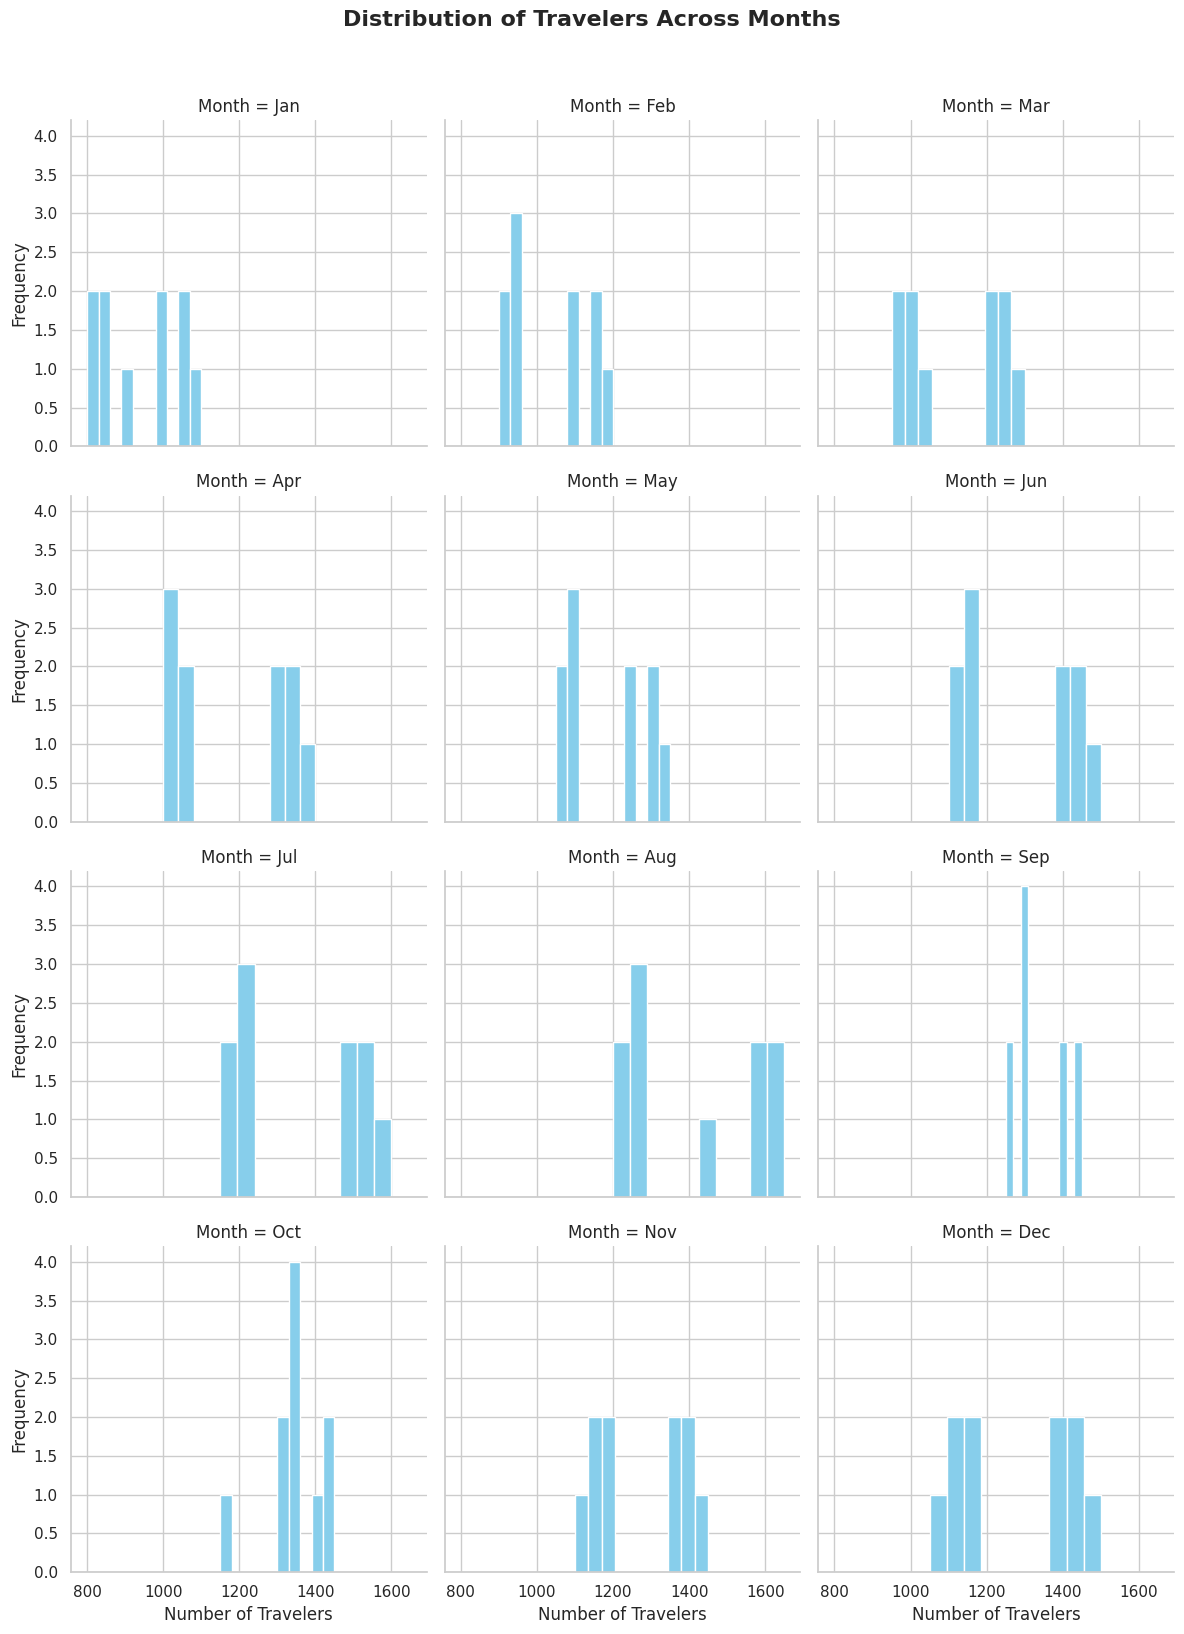

In [ ]:
# histogram
# Set a stylish seaborn theme
sns.set(style="whitegrid")

# Create a FacetGrid with Seaborn
g = sns.FacetGrid(df, col="Month", col_wrap=3, height=4, margin_titles=True)
g.map(plt.hist, "Travelers", bins=10, color="skyblue")

# Adding titles
g.set_axis_labels("Number of Travelers", "Frequency")
g.fig.suptitle("Distribution of Travelers Across Months", y=1.02, fontsize=16, fontweight='bold')

# Adjusting layout
plt.tight_layout()

plt.show()